Selected event: flegrei_2023_10_02_20_08_26
number of channels for event ../DATA/flegrei_2023_10_02_20_08_26/flegrei_2023_10_02_20_08_26.mseed HHE: 17 HHN 17 HHZ 17
Selected event: flegrei_2024_07_26_11_46_21
number of channels for event ../DATA/flegrei_2024_07_26_11_46_21/flegrei_2024_07_26_11_46_21.mseed HHE: 18 HHN 18 HHZ 18
Selected event: flegrei_2024_04_27_03_44_56
number of channels for event ../DATA/flegrei_2024_04_27_03_44_56/flegrei_2024_04_27_03_44_56.mseed HHE: 18 HHN 18 HHZ 18


/var/folders/_5/hfq6n3xn3n53jvjz81t_f2r80000gn/T/ipykernel_24631/3071982727.py:104: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


Selected event: flegrei_2024_05_20_18_10_03
number of channels for event ../DATA/flegrei_2024_05_20_18_10_03/flegrei_2024_05_20_18_10_03.mseed HHE: 18 HHN 18 HHZ 18
Selected event: flegrei_2023_09_07_17_45_28
number of channels for event ../DATA/flegrei_2023_09_07_17_45_28/flegrei_2023_09_07_17_45_28.mseed HHE: 17 HHN 17 HHZ 17
Selected event: flegrei_2023_09_27_01_35_34
number of channels for event ../DATA/flegrei_2023_09_27_01_35_34/flegrei_2023_09_27_01_35_34.mseed HHE: 17 HHN 17 HHZ 17
Selected event: flegrei_2024_05_20_19_46_14
number of channels for event ../DATA/flegrei_2024_05_20_19_46_14/flegrei_2024_05_20_19_46_14.mseed HHE: 18 HHN 18 HHZ 18


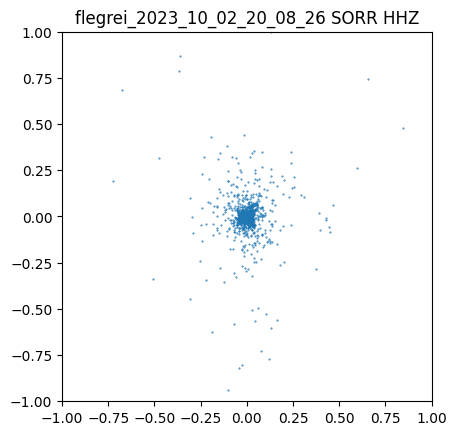

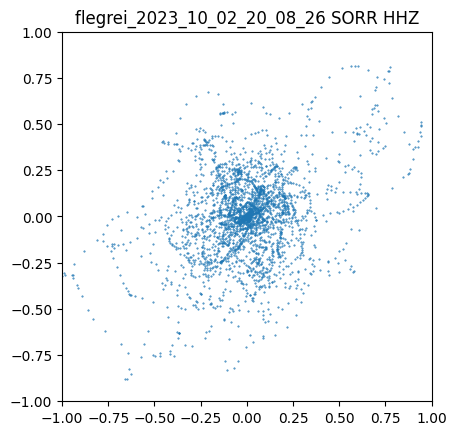

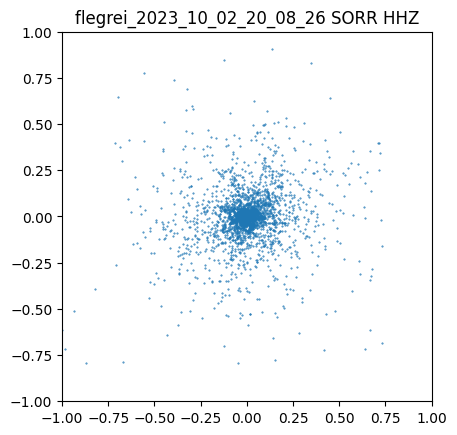

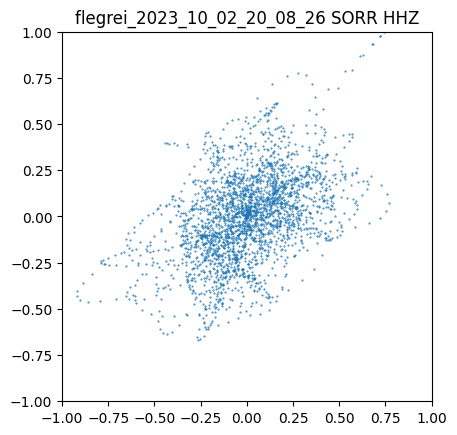

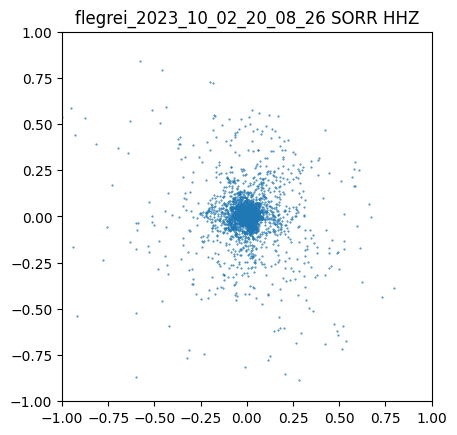

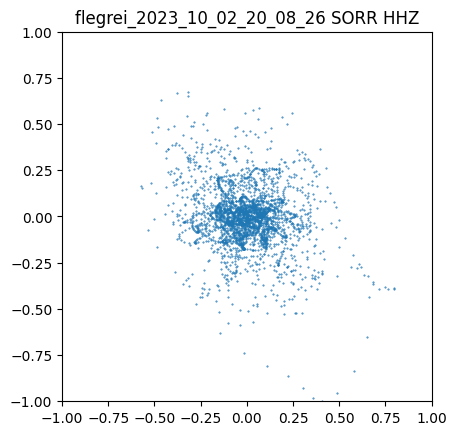

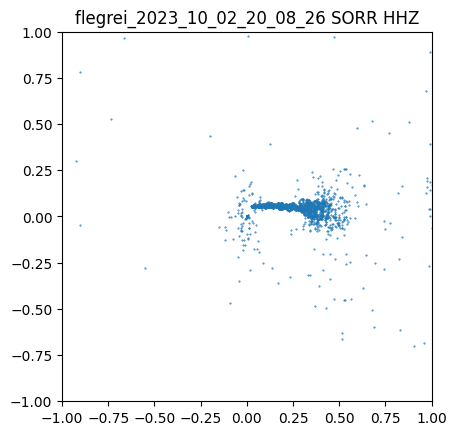

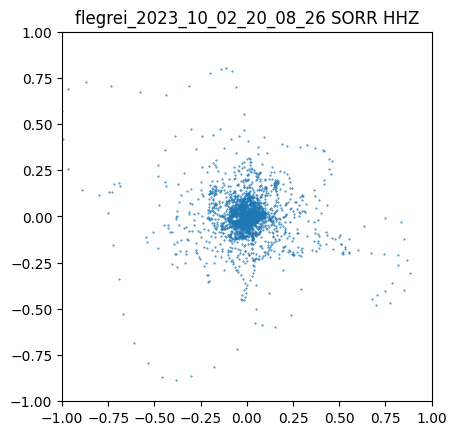

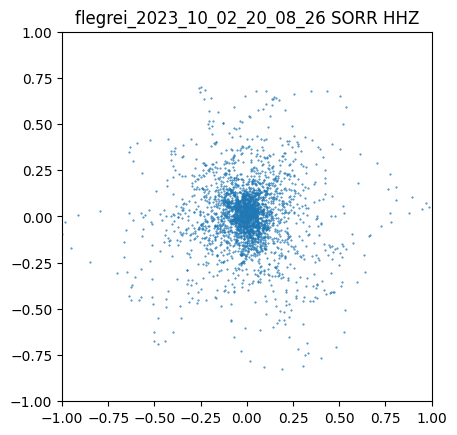

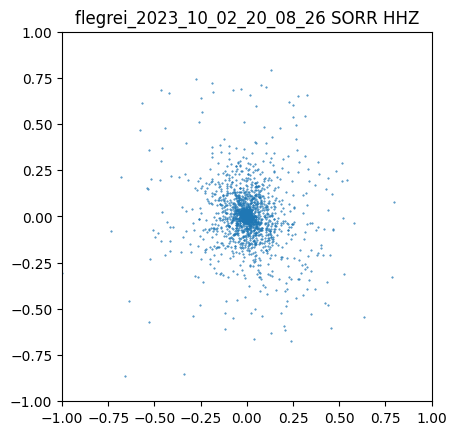

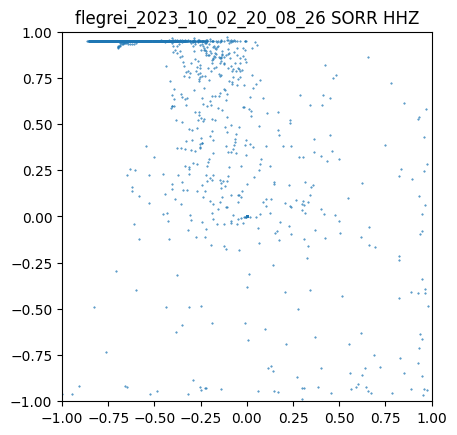

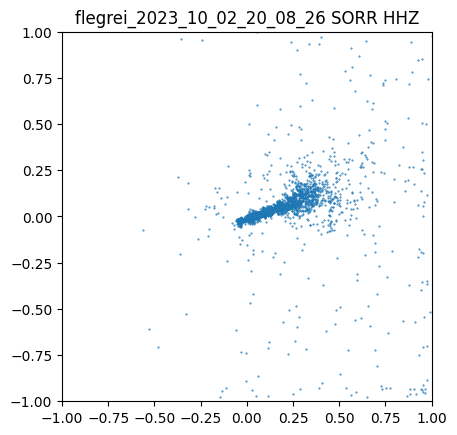

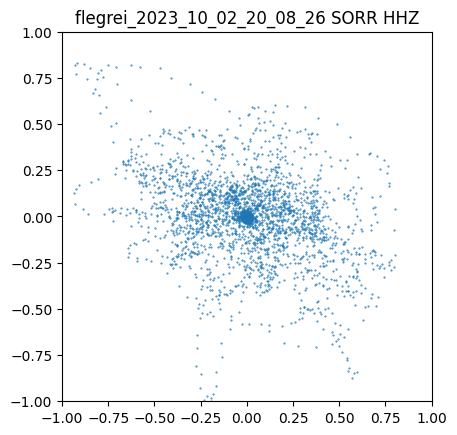

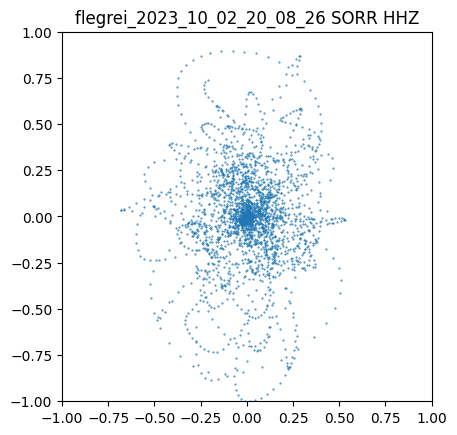

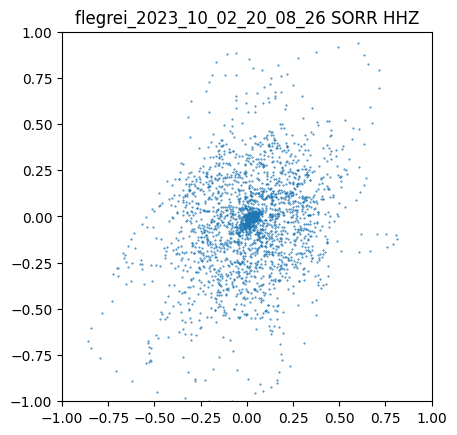

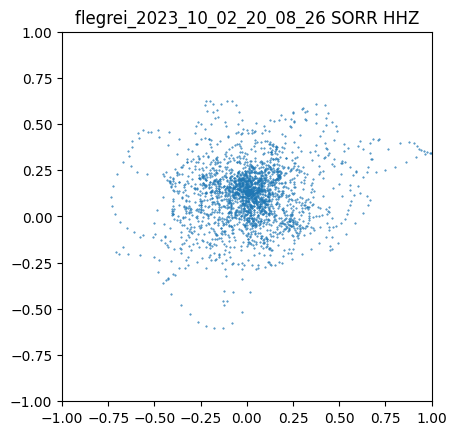

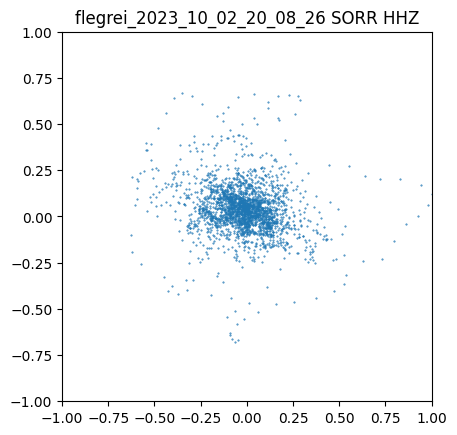

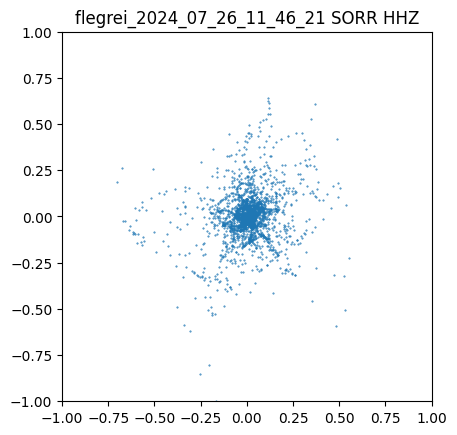

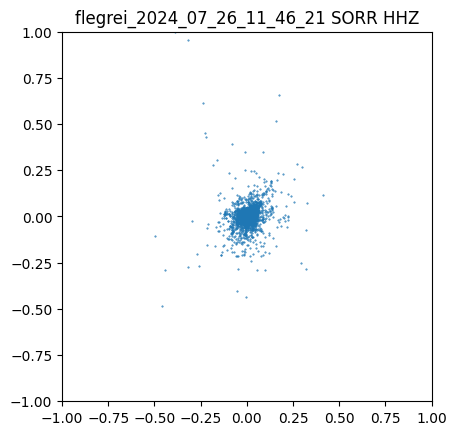

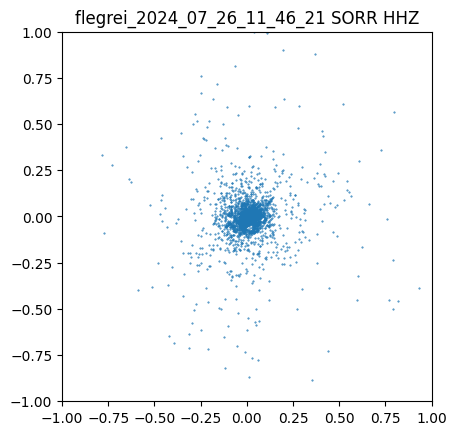

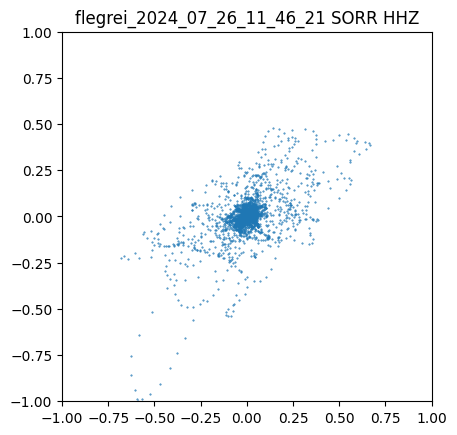

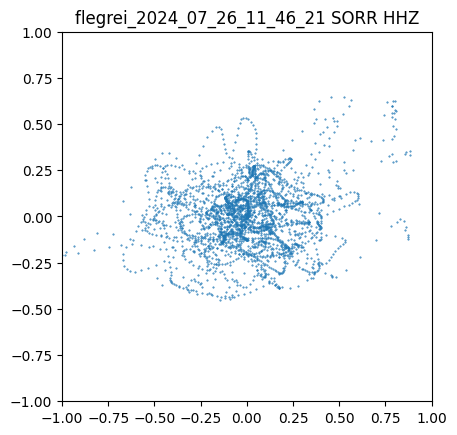

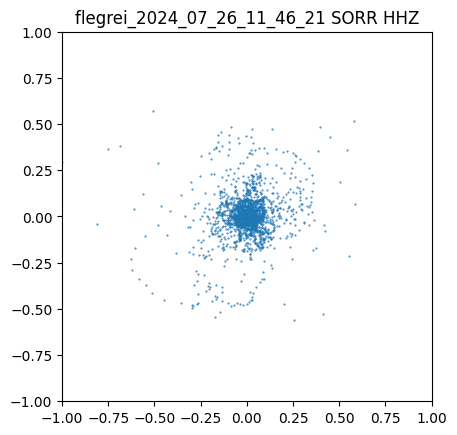

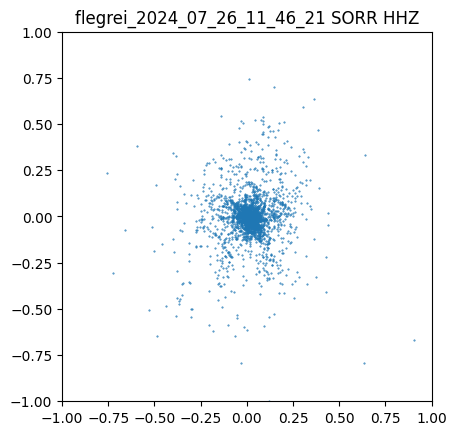

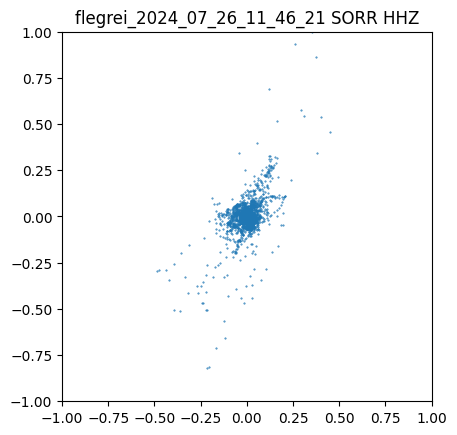

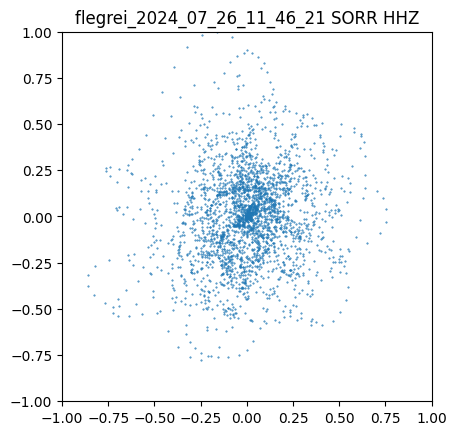

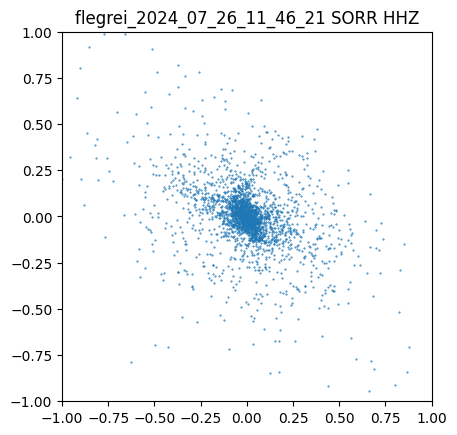

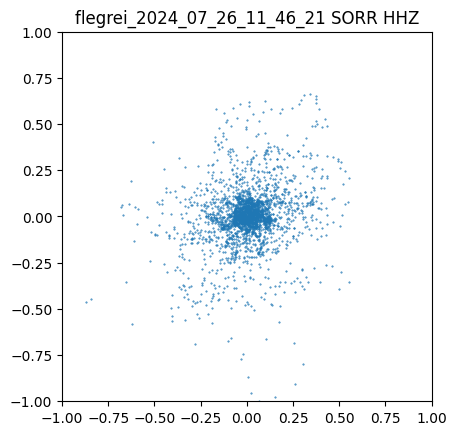

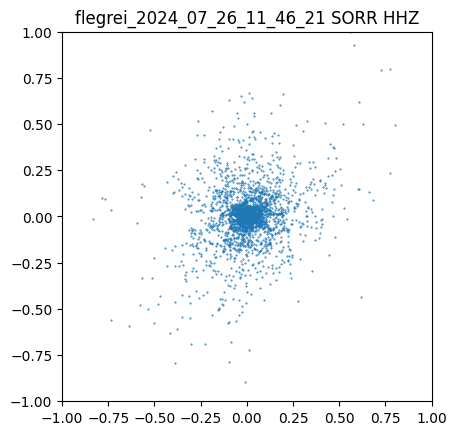

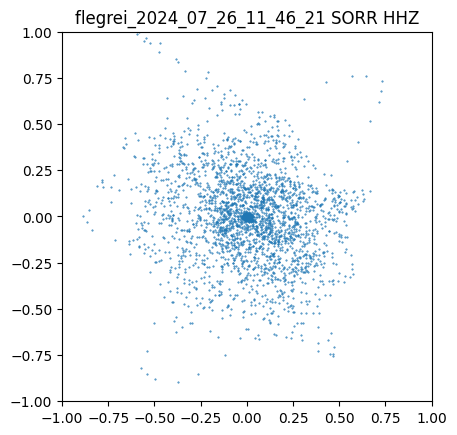

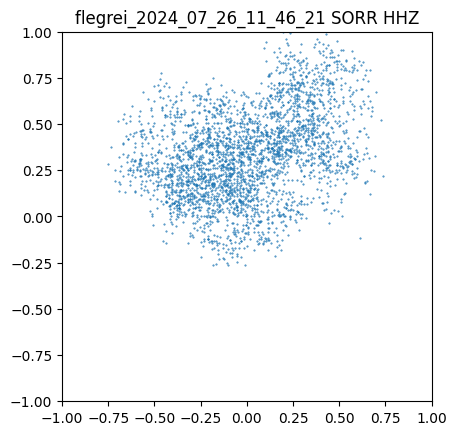

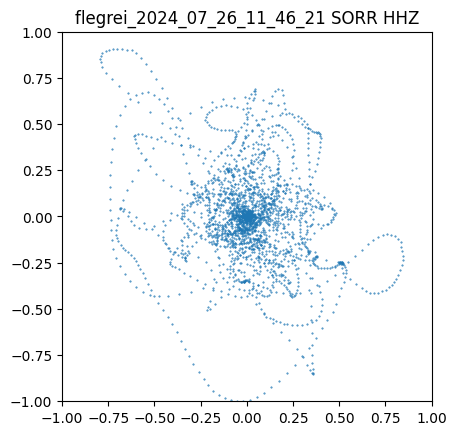

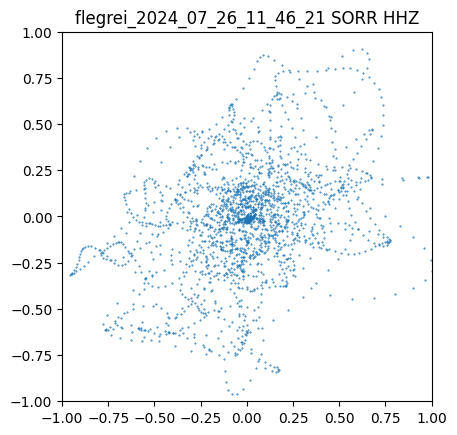

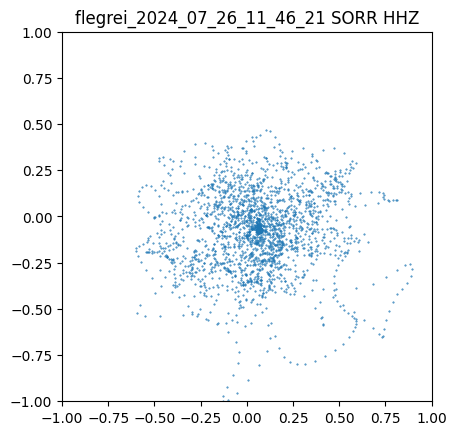

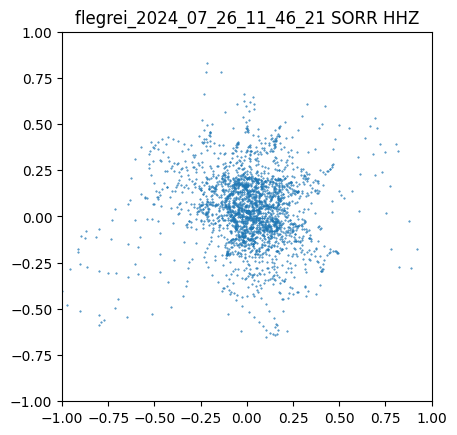

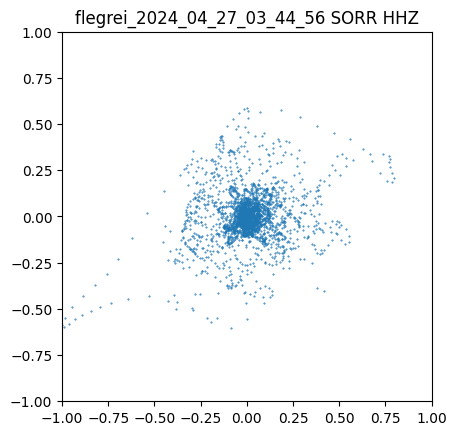

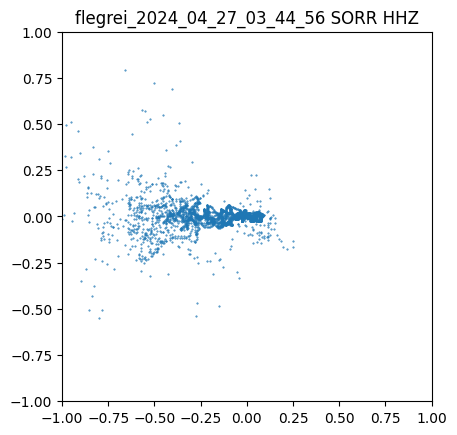

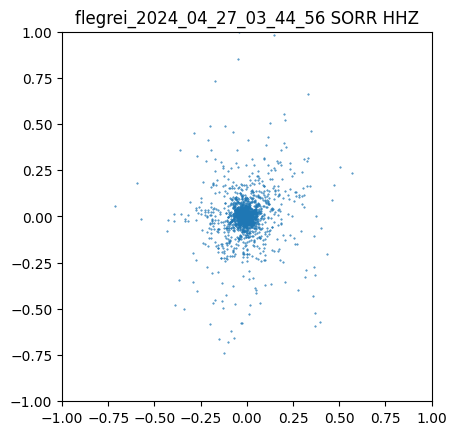

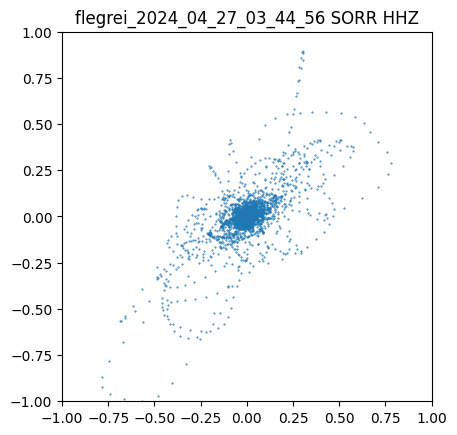

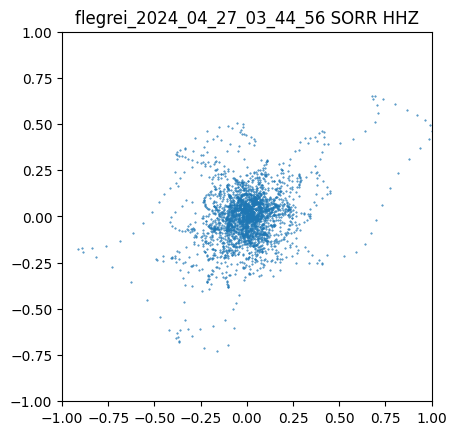

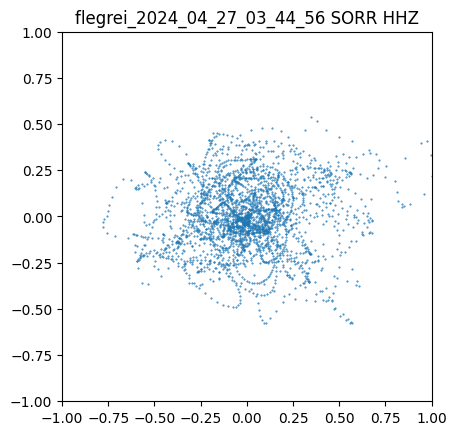

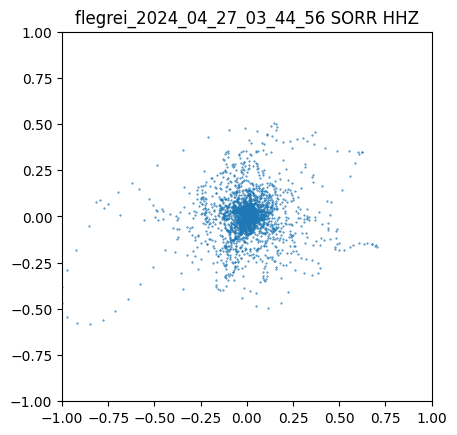

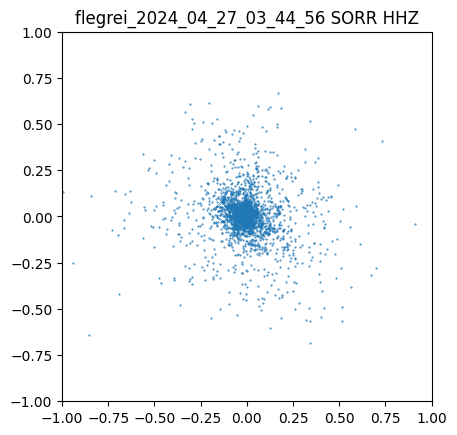

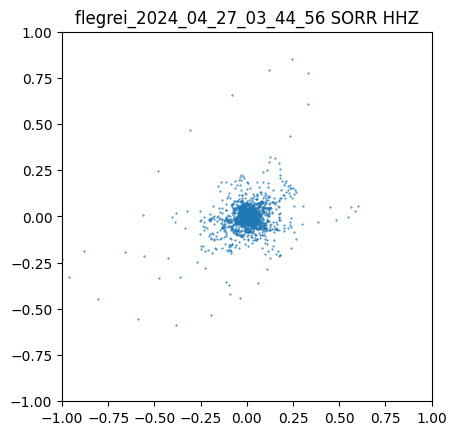

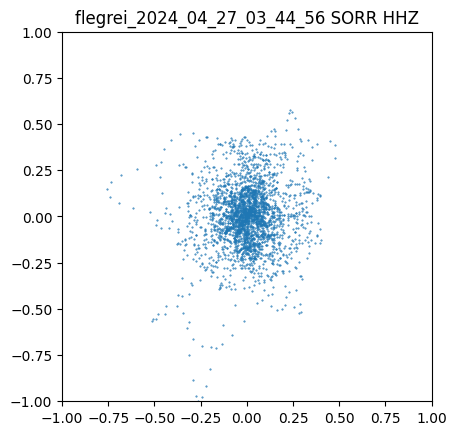

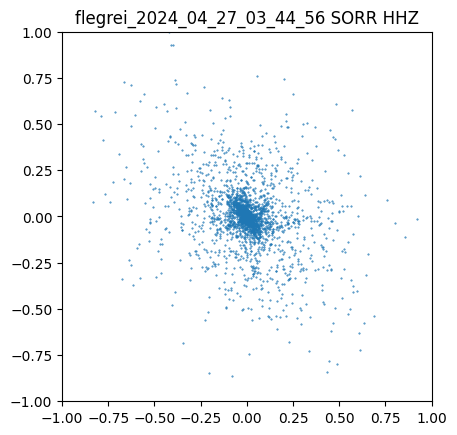

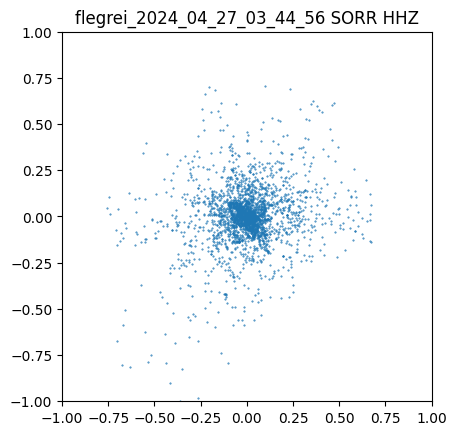

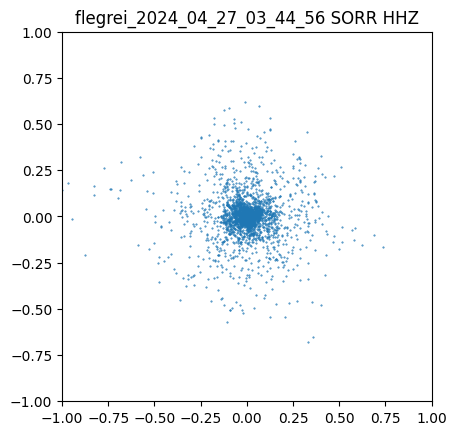

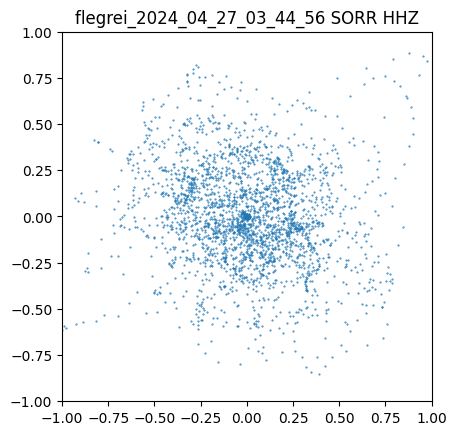

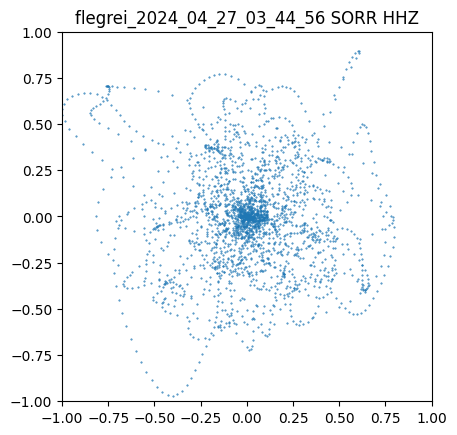

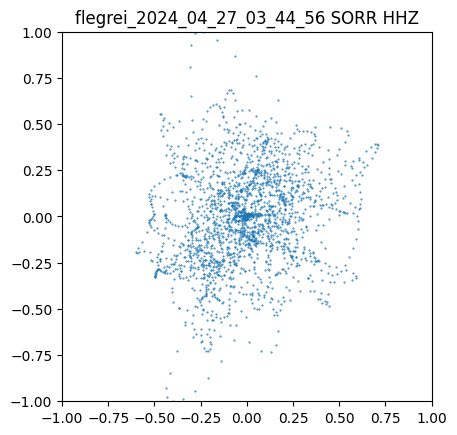

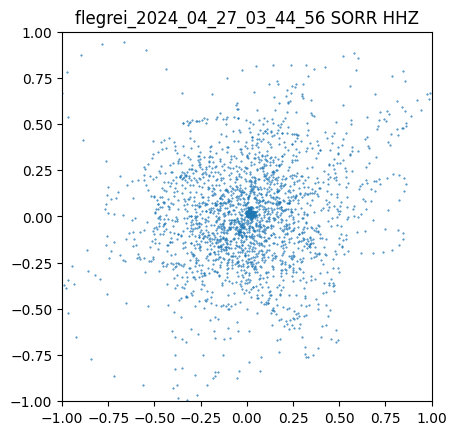

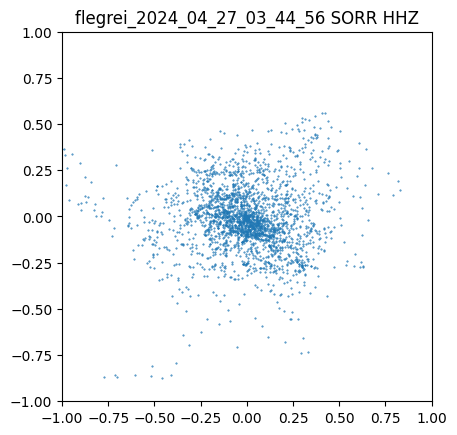

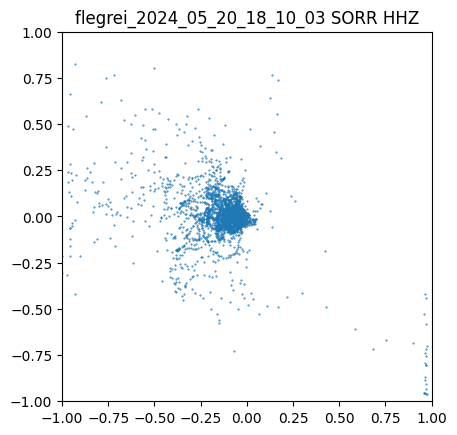

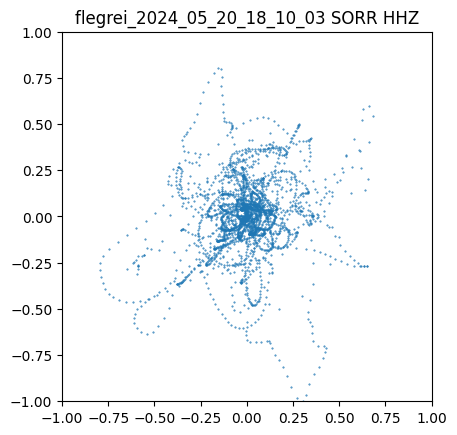

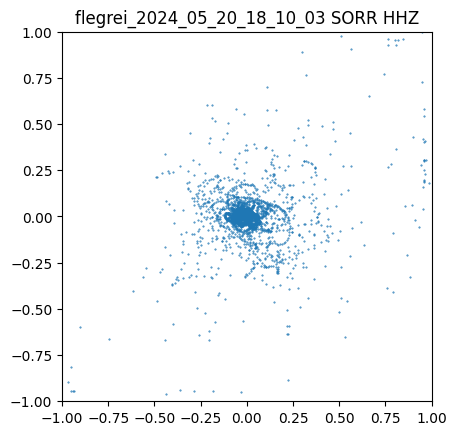

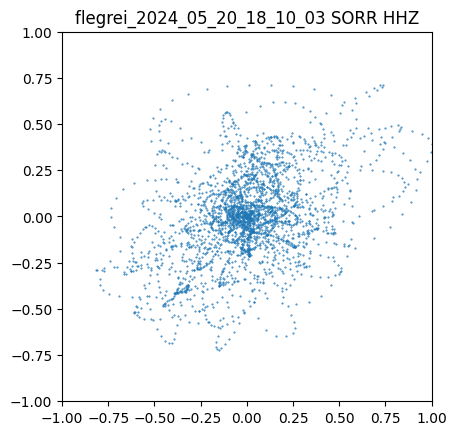

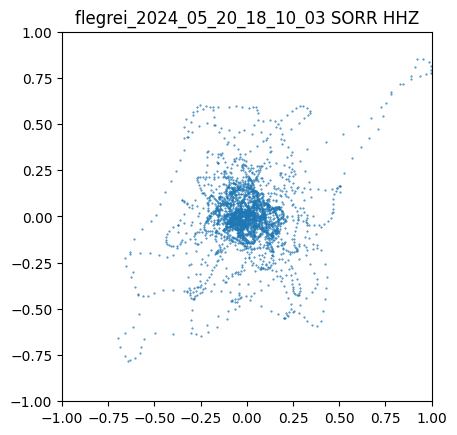

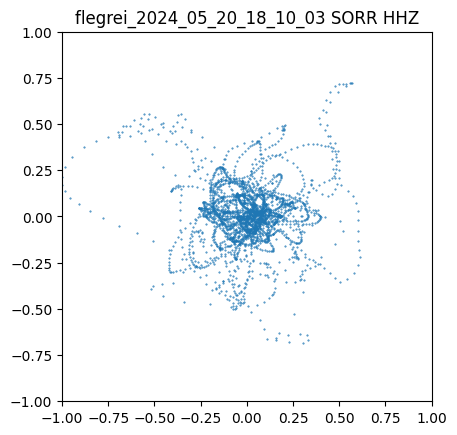

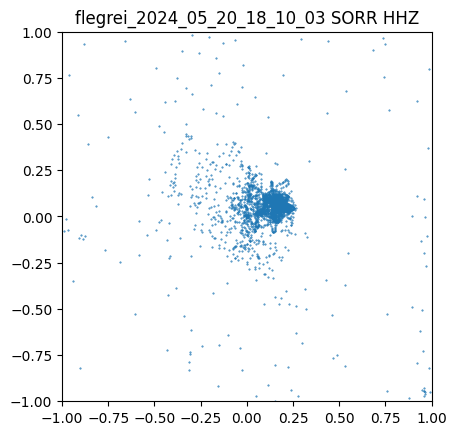

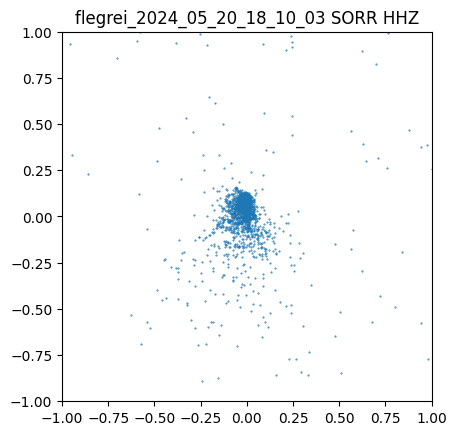

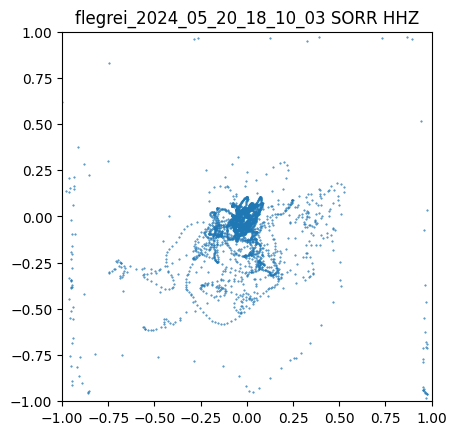

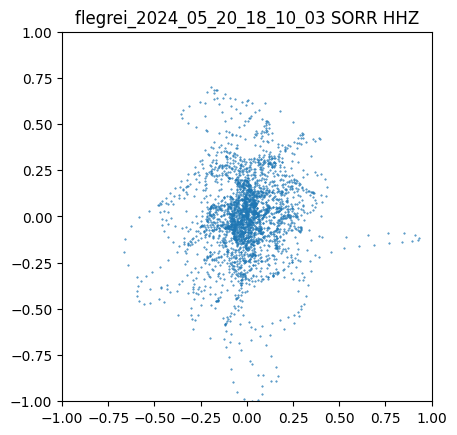

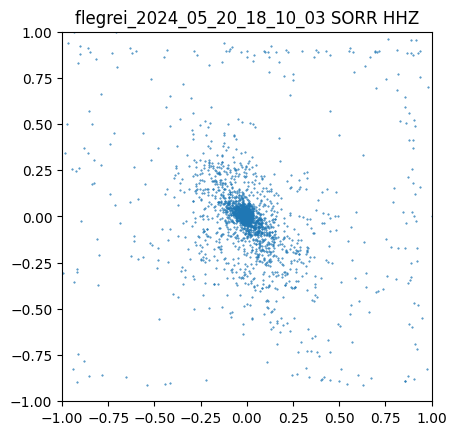

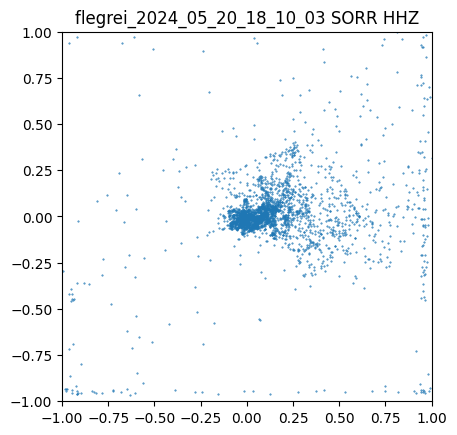

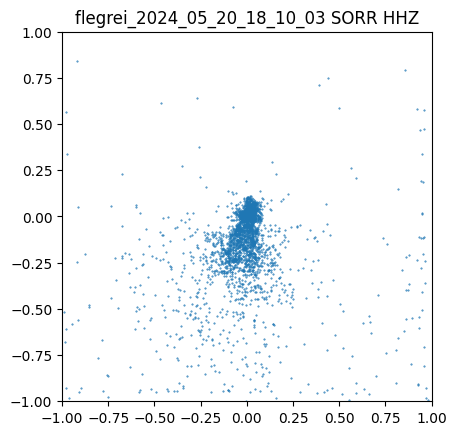

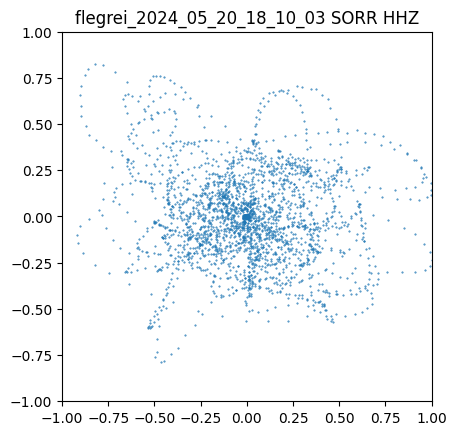

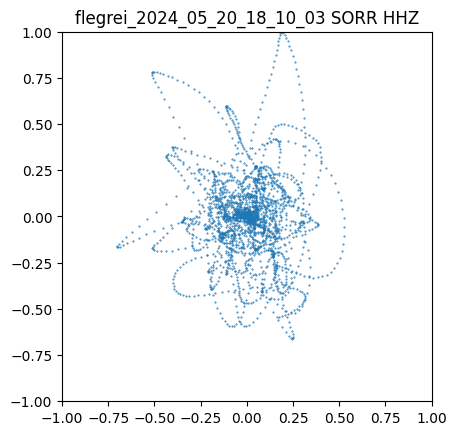

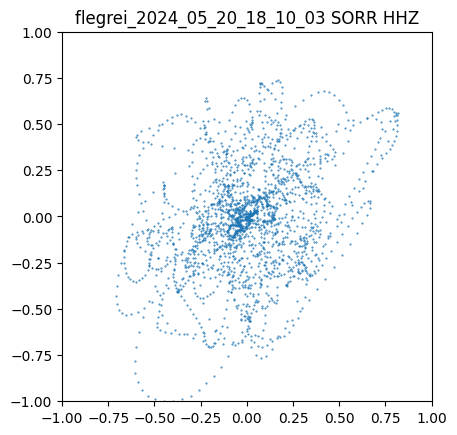

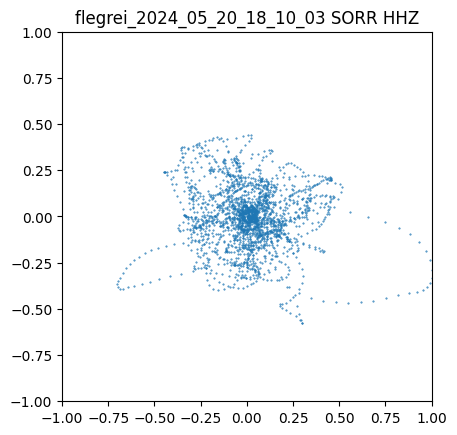

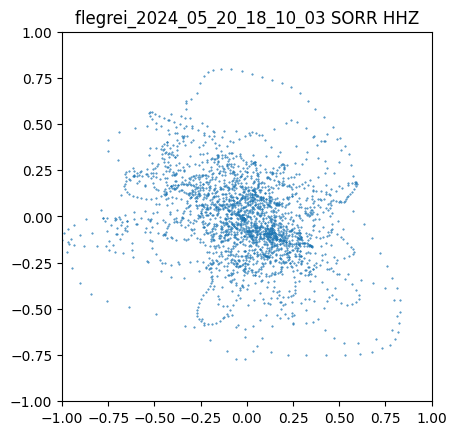

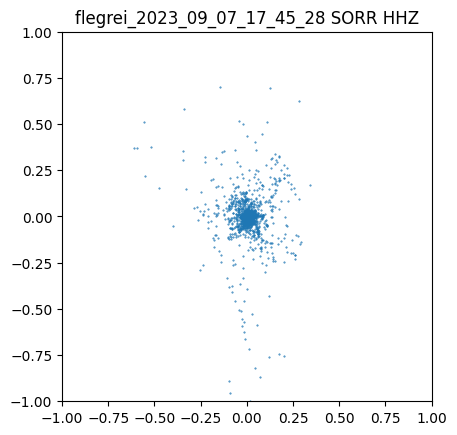

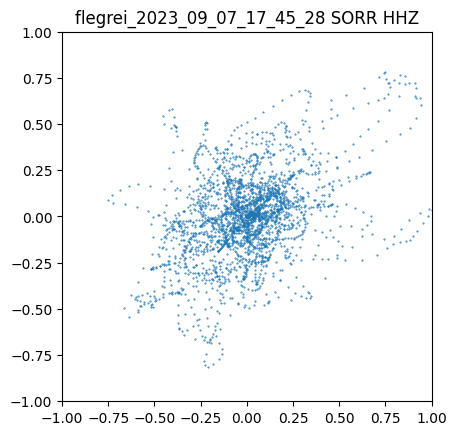

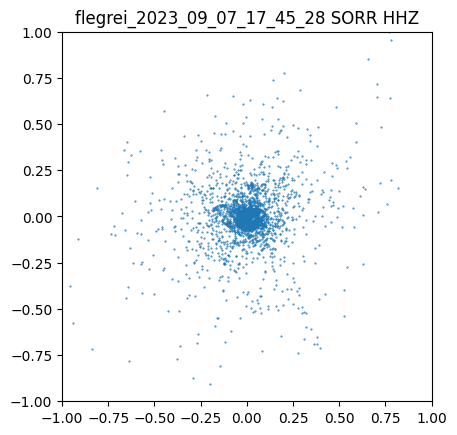

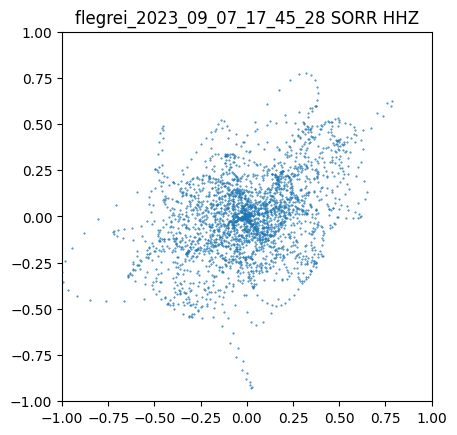

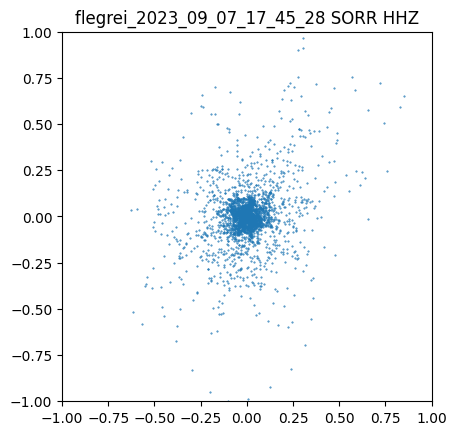

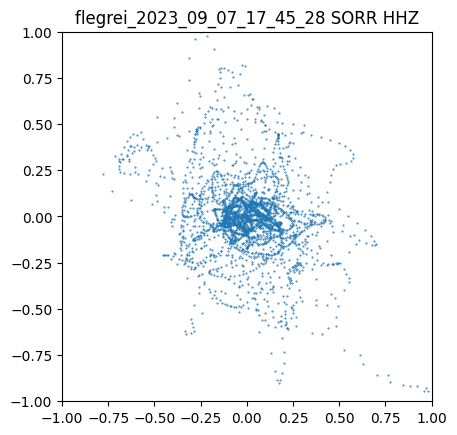

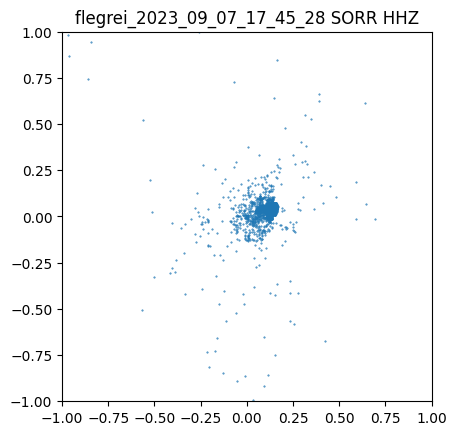

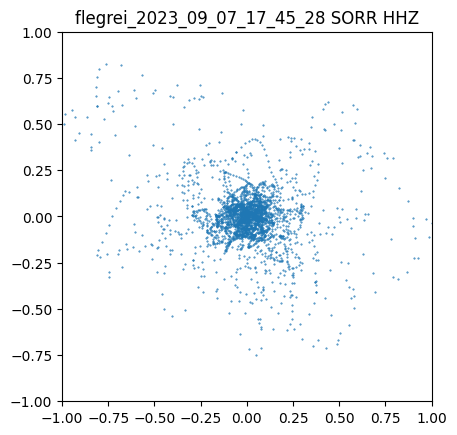

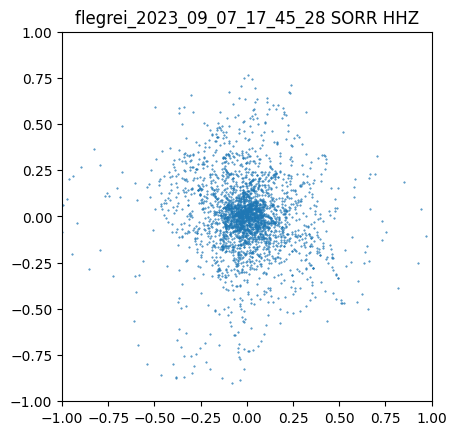

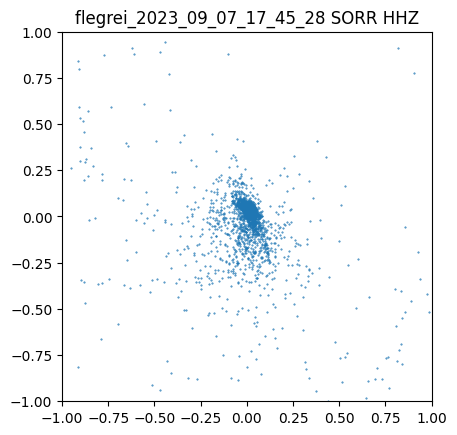

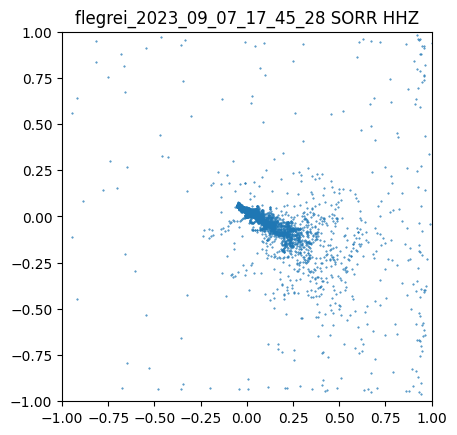

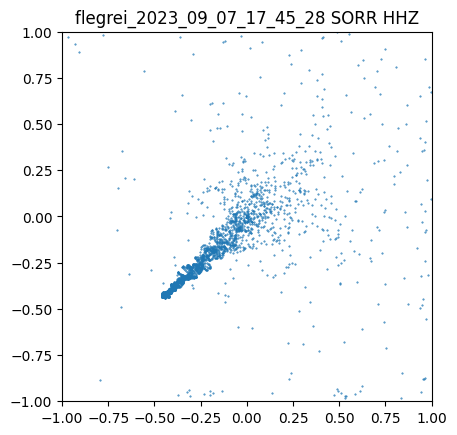

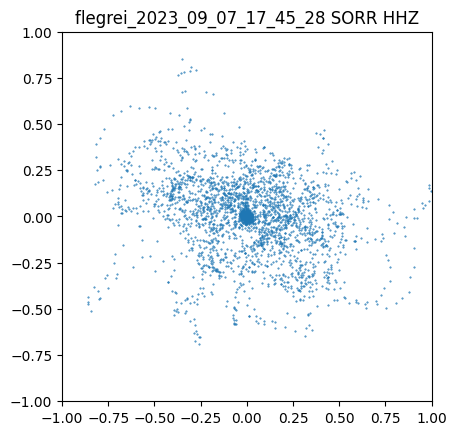

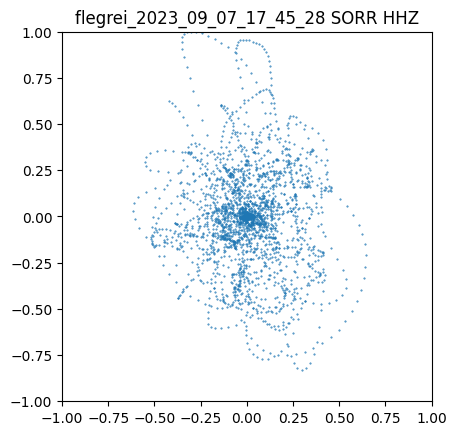

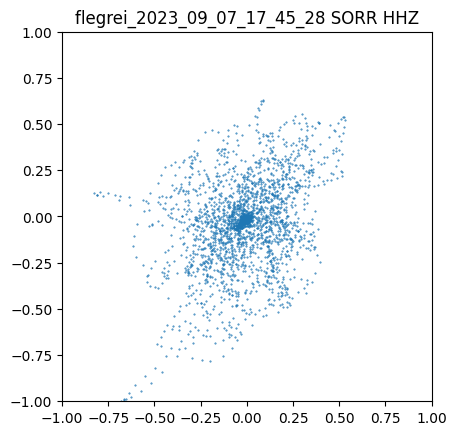

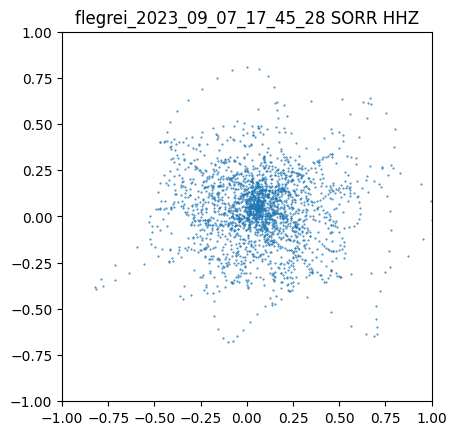

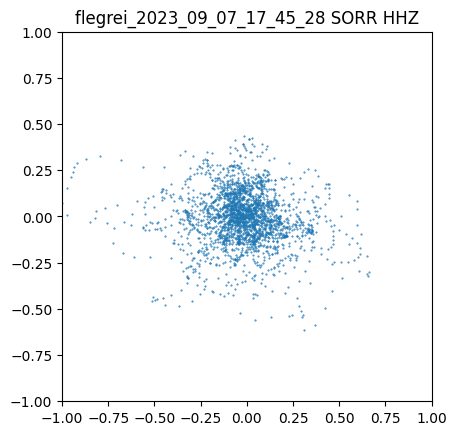

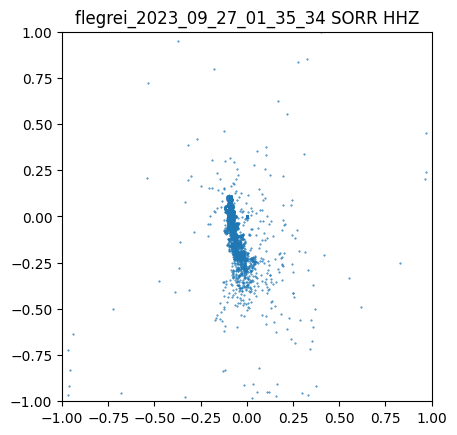

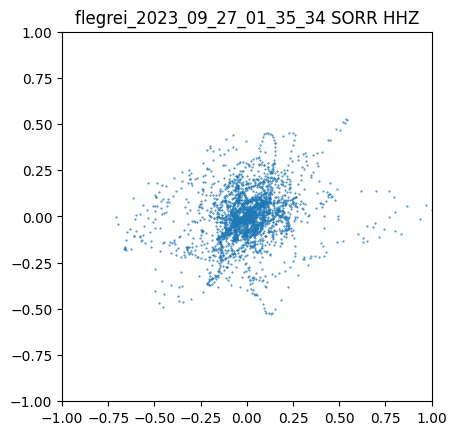

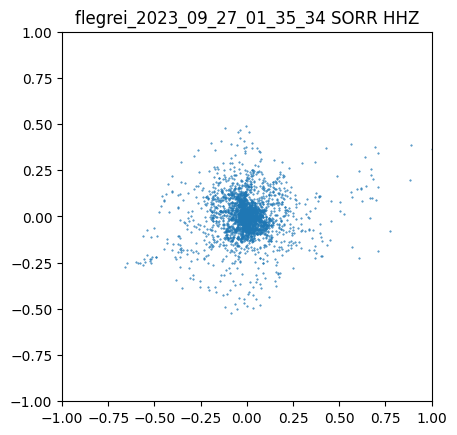

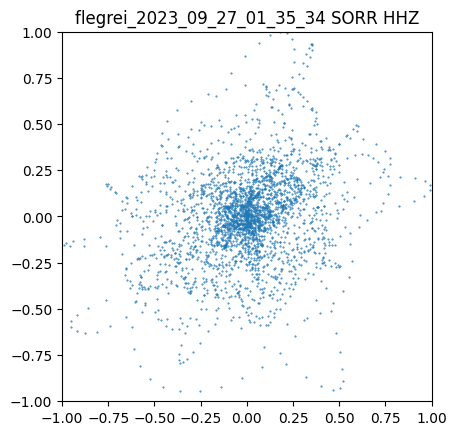

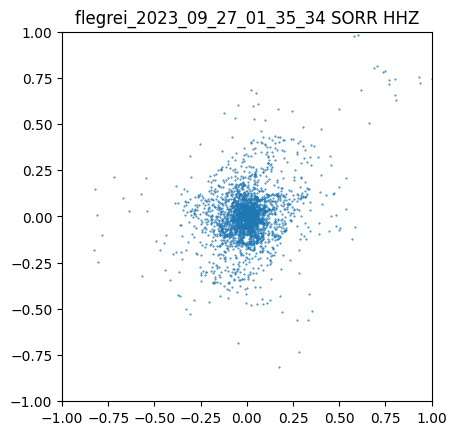

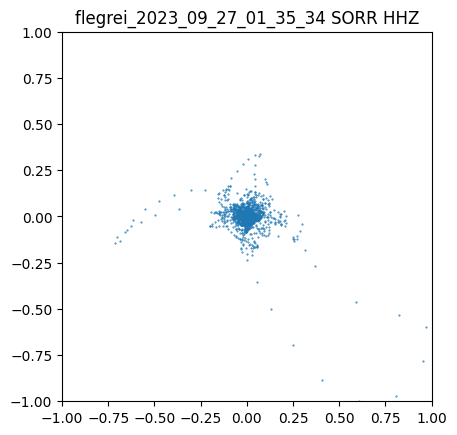

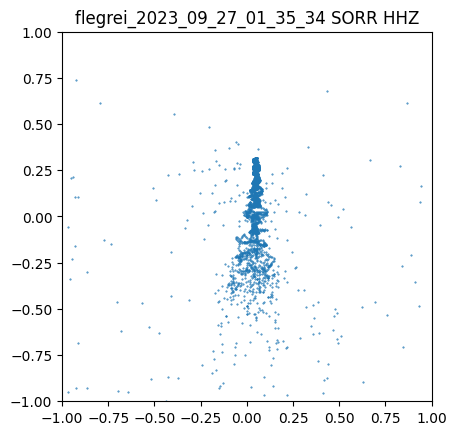

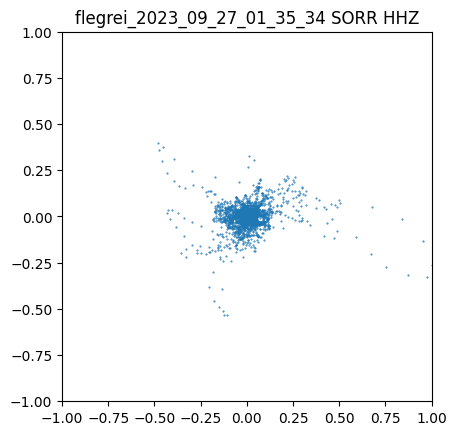

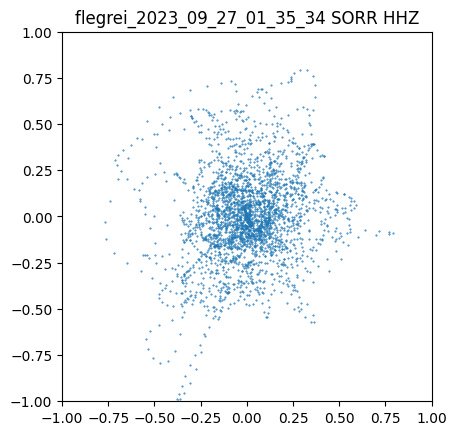

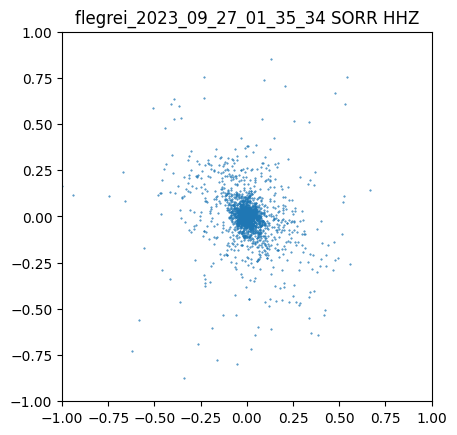

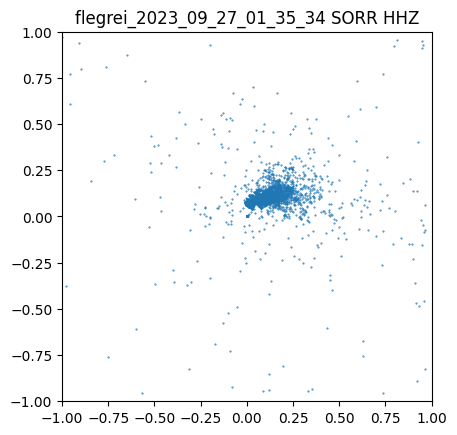

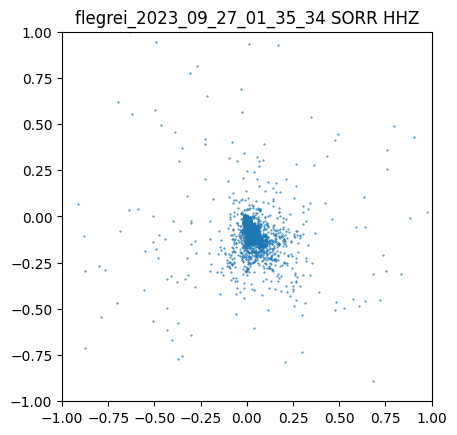

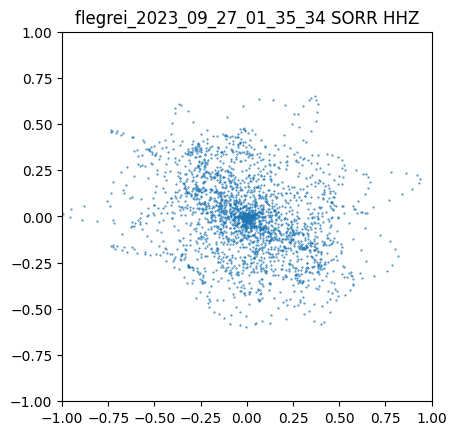

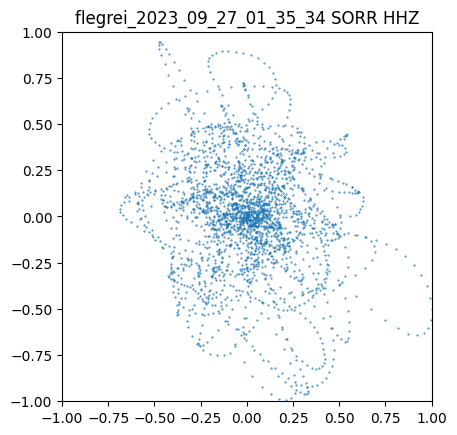

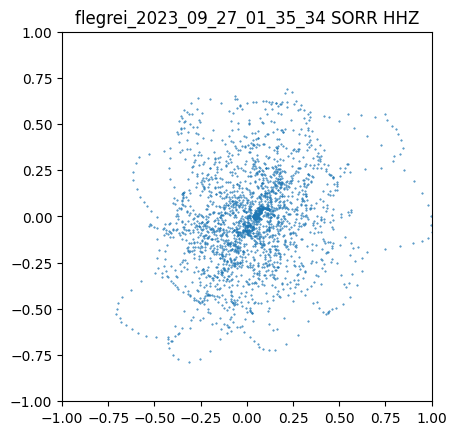

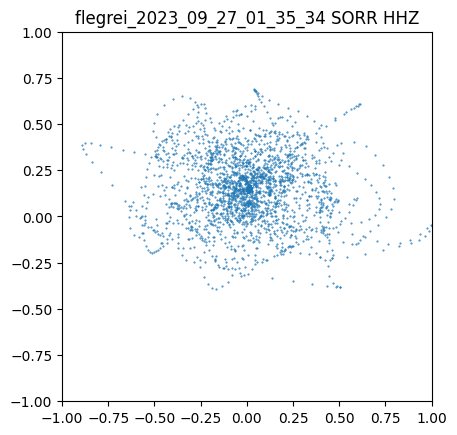

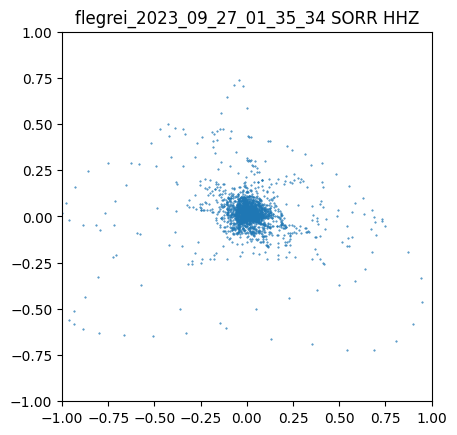

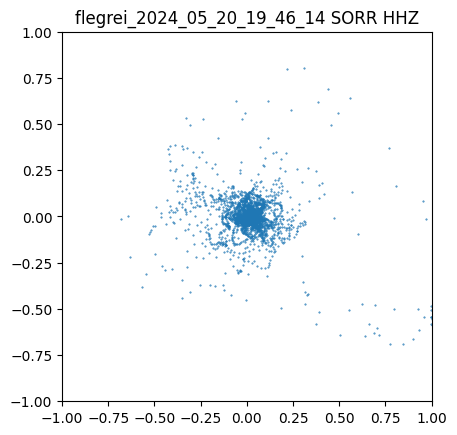

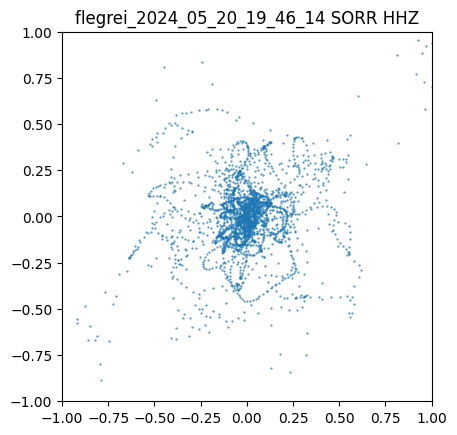

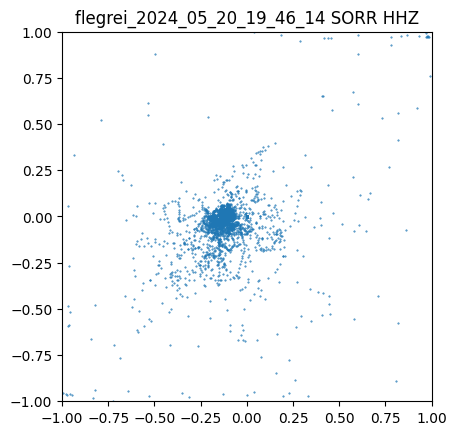

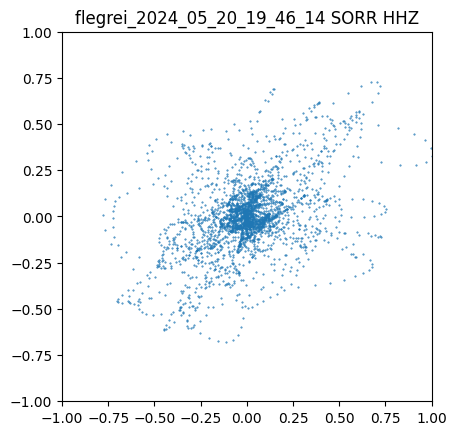

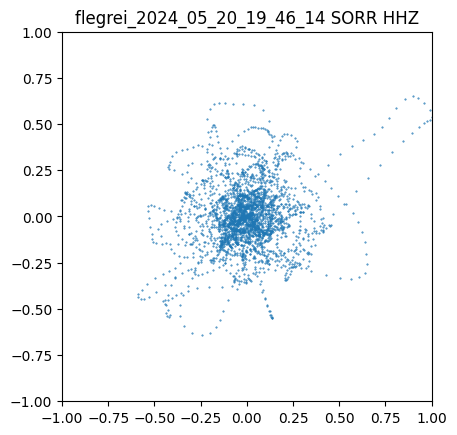

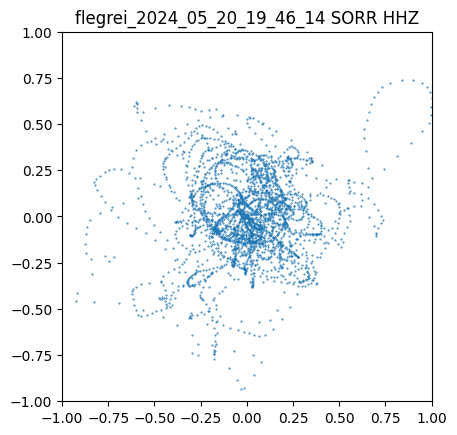

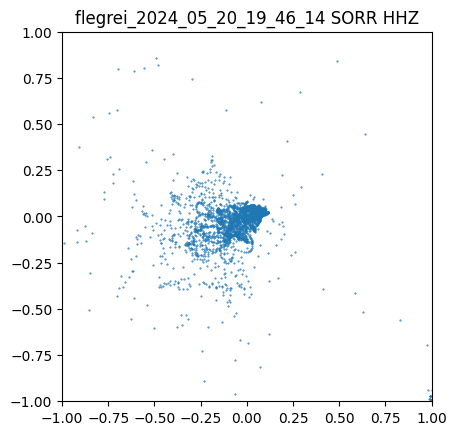

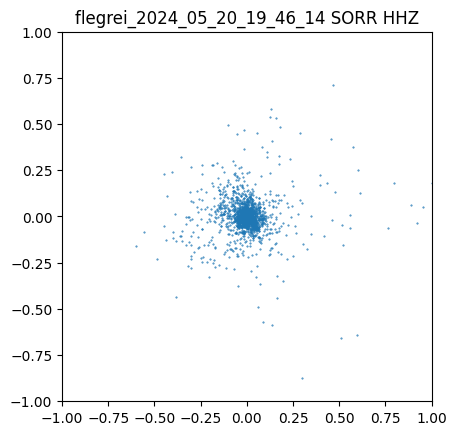

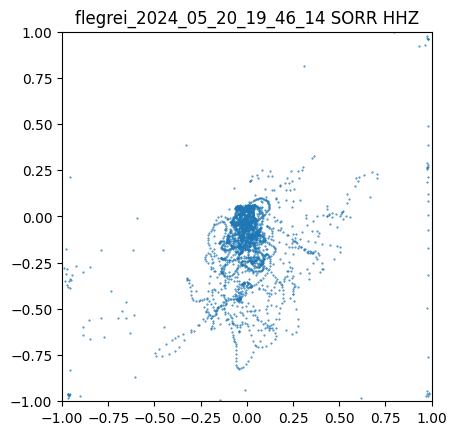

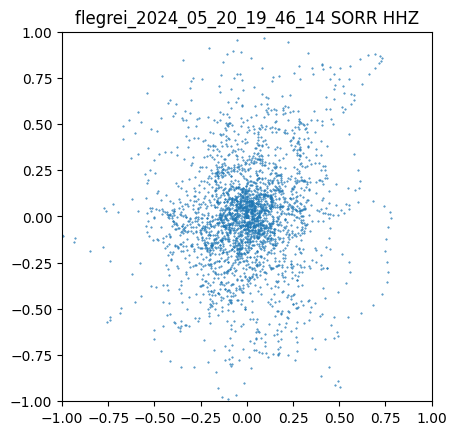

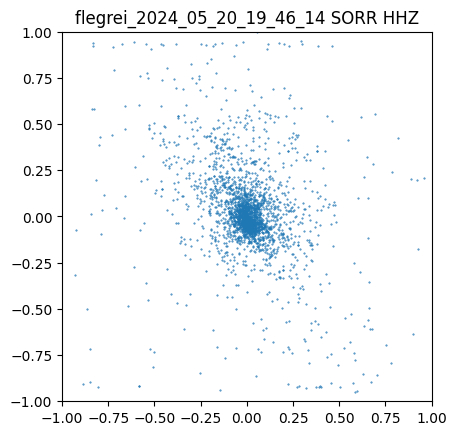

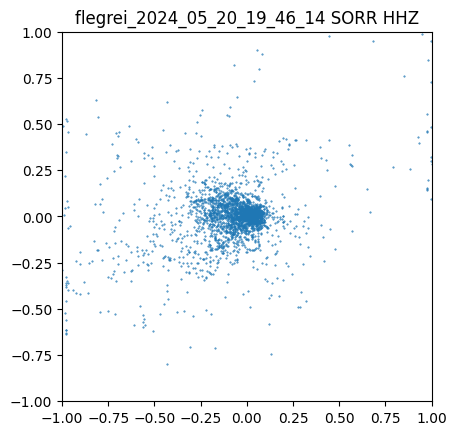

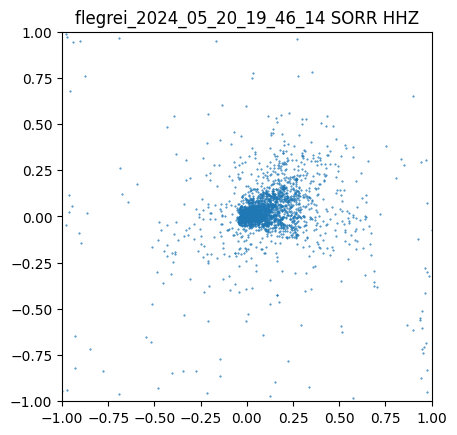

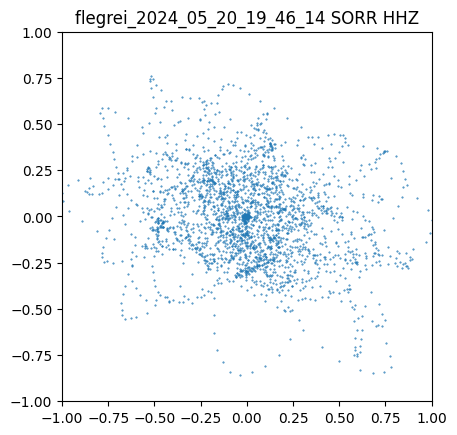

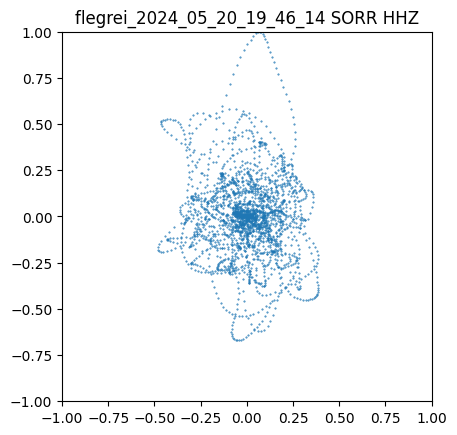

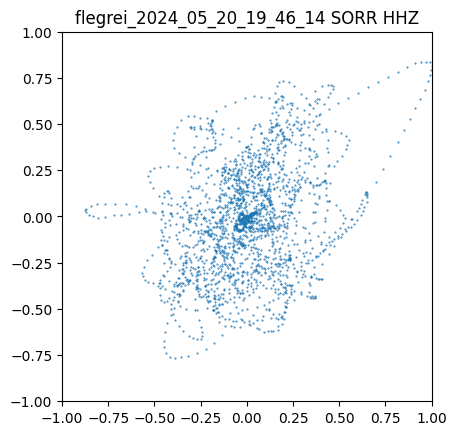

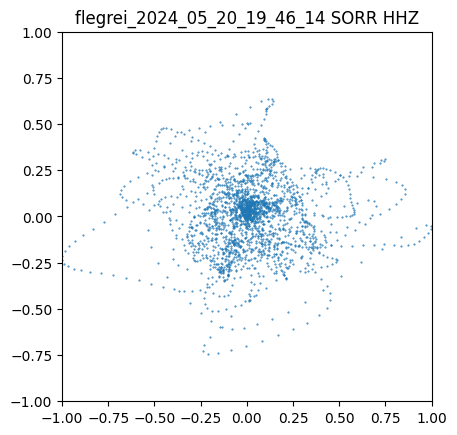

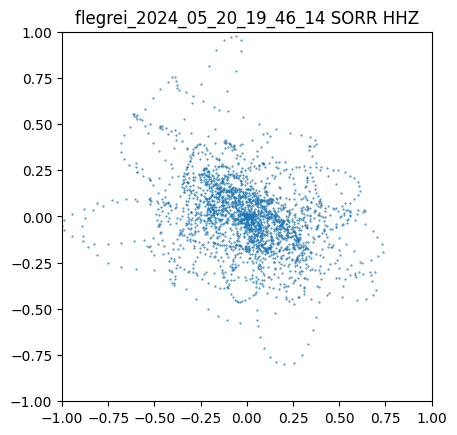

In [ ]:
###  PARTICLE MOTION OF CATALOGUE  

import matplotlib.pyplot as plt
import numpy as num

from pyrocko import util, model, io, trace, moment_tensor, gmtpy
from pyrocko import pz
from pyrocko import orthodrome as od
from pyrocko.io import quakeml
from pyrocko.io import stationxml as fdsn
from pyrocko.client import catalog
from pyrocko.automap import Map

from obspy.clients.fdsn.client import Client
from obspy import UTCDateTime
from obspy.core.event import Catalog
from obspy.core.stream import Stream
from obspy.core.event import Event
from obspy.core.event import Origin
from obspy.core.event import Magnitude
from obspy import read
from obspy import read_events
from obspy import read_inventory
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import os
import pickle

import geopy.distance


workdir='../'

plotdir =  os.path.join(workdir,'PLOTS')
plotdir =  os.path.join(plotdir,'PPM')                                         #CHANGE

catdir =  os.path.join(workdir,'CAT')
meta_datadir=os.path.join(workdir,'META_DATA')
datadir=os.path.join(workdir,'DATA')                                         #CHANGE

#select stations (pyrocko)
station_name = os.path.join(meta_datadir, 'stations_flegrei_INGV.pf')

st = model.load_stations(station_name)
#print('Number of stations', len(st))

#select catalogue (pyrocko)
catname = os.path.join(catdir, 'catalogue_flegrei_mag_2_5_XL.pf')

events = model.load_events(catname)
#print('Number of events:', len(events))

###################################

for file in os.listdir(datadir):
    #select event
    name = os.fsdecode(file)

    if name.startswith(events[0].name.split('_')[0]): # check if name of the folder is 'flegrei*'

        ev_dir=os.path.join(datadir,name)
        ev_name=os.path.join(ev_dir,name + '.mseed')

        for ev in events:
            if ev.name==name:
                print('Selected event:',ev.name)
                #print('lat:',ev.lat,' lon:',ev.lon)
                event=ev

                #select wavelet (obspy)  
                w=read(ev_name)
                #print('number of traces in event:',len(w))

                st_E_trace=[]
                st_N_trace=[]
                st_Z_trace=[]
                for trace in w:
                    for s in st:
                        if trace.stats.station==s.station:
                            if trace.stats.channel == 'HHE':
                                st_E_trace.append( [ [trace.stats.station, trace.stats.channel , s.lat,s.lon ], [trace.data] ] ) #station, channel, lat, long
                            if trace.stats.channel == 'HHN':
                                st_N_trace.append( [ [trace.stats.station, trace.stats.channel , s.lat,s.lon ], [trace.data] ] ) #station, channel, lat, long
                            if trace.stats.channel == 'HHZ':
                                st_Z_trace.append( [ [trace.stats.station, trace.stats.channel , s.lat,s.lon ], [trace.data] ] ) #station, channel, lat, long
                print('number of channels for event', ev_name, 'HHE:',len(st_E_trace),'HHN',len(st_N_trace),'HHZ',len(st_Z_trace))

                for n in range(len(st_N_trace)):
                    x=st_E_trace[n][1]
                    x=num.array(x).flatten()
                    x=x[4000:7000]
                    max_x=num.max(num.abs(x))

                    y=st_N_trace[n][1]
                    y=num.array(y).flatten()
                    y=y[4000:7000]
                    max_y=num.max(num.abs(y))

                    max_all=num.max((max_x,max_y))

                    x=x/max_all
                    y=y/max_all

                    plt.figure()
                    plt.title(ev.name+' '+st_E_trace[+ ' ' + trace.stats.channel)
                    plt.scatter(x,y,marker='.',s=0.8)
                    plt.xlim(-1,1)
                    plt.ylim(-1,1)
                    ax = plt.gca()
                    ax.set_aspect('equal', adjustable='box')


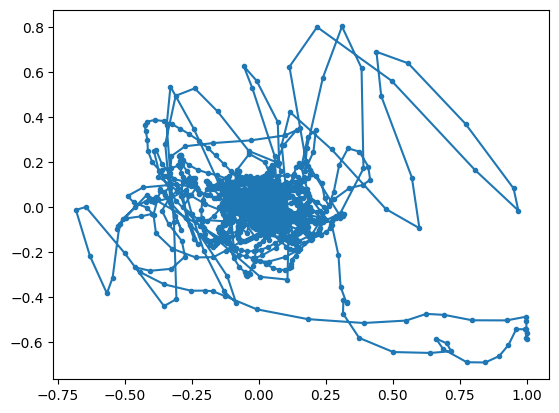

In [2]:
for n in range(1):
    x=st_E_trace[n][1]
    x=num.array(x).flatten()
    x=x[4000:7000]
    max_x=num.max(num.abs(x))

    y=st_N_trace[n][1]
    y=num.array(y).flatten()
    y=y[4000:7000]
    max_y=num.max(num.abs(y))

    max_all=num.max((max_x,max_y))

    x=x/max_all
    y=y/max_all
    t=num.arange(x.size)
    plt.plot(x,y,'.-')